# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.






### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib import colors
import seaborn as sns
%matplotlib inline

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Question 1. (5pts) Create a new variable, DELAY_OR_NOT: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (ARRIVAL_DELAY >= 15).

In [2]:
df1 = pd.read_csv('cs109a_midterm.csv')
df1['DELAY_OR_NOT'] = np.where(df1['ARRIVAL_DELAY']>=15, 1, 0)
df1.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


### Question 2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

In [3]:
print("the names of all columns:\n", list(df1))

the names of all columns:
 ['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT']


#### Predictors should not be used:
- ARRIVAL_DELAY: This column has already be encoded into the "DELAY_OR_NOT" column. If we use this column, we are like cheating to have y information to classify y.
- DEPARTURE_DELAY: Same idea as above. If the flight is delayed at departure, it is very likely that it will be delayed at arrival.
- ELAPSED_TIME: This information should not be used too, because we want to predict whether a flight is delayed or not based only on the information before it takes off.
- AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY: Similarly, we don't know whether the flight is delayed or not when we are building the model. So we should not have access to such "future" information.

### Question 3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

In [4]:
delay_airlines = df1.groupby('AIRLINE')['DELAY_OR_NOT'].mean()
# delay_airlines

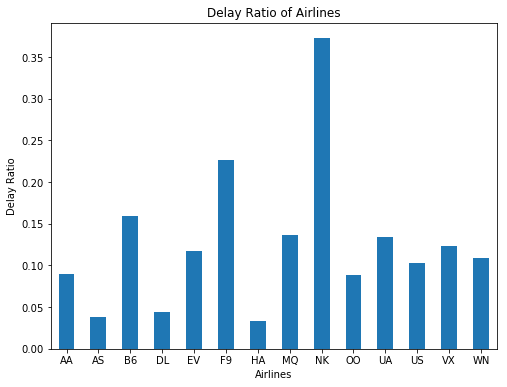

In [5]:
ax = delay_airlines.plot(kind='bar', title="Delay Ratio of Airlines", figsize=(8,6), rot=0)
ax.set_xlabel('Airlines')
ax.set_ylabel('Delay Ratio')
plt.show()

In [6]:
df2 = df1.copy()
# df2.sort('SCHED_DEP')
df2 = df1.sort_values(by='SCHED_DEP')
df2.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
749153,2015-11-30,11,30,1,UA,1561,N75435,ORD,PHL,00:01:00,...,8.0,678,122.0,105.0,NaN,NaN,NaN,NaN,NaN,0
475886,2015-11-30,11,30,1,UA,822,N483UA,ORD,BDL,00:01:00,...,-9.0,783,129.0,113.0,NaN,NaN,NaN,NaN,NaN,0
652920,2015-12-28,12,28,1,UA,1456,N808UA,DEN,BZN,00:02:00,...,7.0,524,112.0,97.0,NaN,NaN,NaN,NaN,NaN,0
16660,2015-07-18,7,18,6,NK,298,N605NK,LAS,IAH,00:03:00,...,-1.0,1222,177.0,182.0,NaN,NaN,NaN,NaN,NaN,0
683555,2015-07-28,7,28,2,NK,298,N621NK,LAS,IAH,00:03:00,...,-2.0,1222,177.0,176.0,NaN,NaN,NaN,NaN,NaN,0


In [7]:
dep_time = df2['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df2['dep_hour'] = dep_h

delay_dep_hours = df2.groupby('dep_hour')['DELAY_OR_NOT'].mean()
# delay_dep_hours

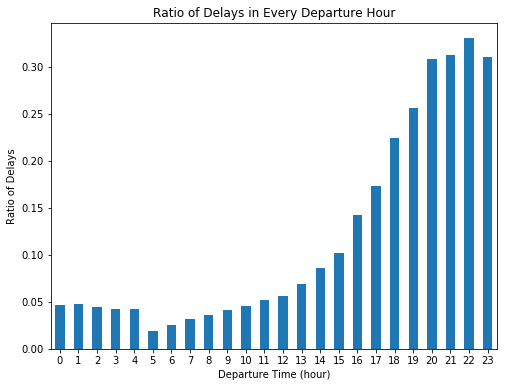

In [8]:
ax = delay_dep_hours.plot(kind='bar', title="Ratio of Delays in Every Departure Hour", figsize=(8,6), rot=0)
ax.set_xlabel('Departure Time (hour)')
ax.set_ylabel('Ratio of Delays')
plt.show()

In [9]:
ORD_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'ORD']['DELAY_OR_NOT'].mean()
BOS_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'BOS']['DELAY_OR_NOT'].mean()
LAX_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'LAX']['DELAY_OR_NOT'].mean()
JFK_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'JFK']['DELAY_OR_NOT'].mean()
LAS_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'LAS']['DELAY_OR_NOT'].mean()
DEN_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'DEN']['DELAY_OR_NOT'].mean()
SEA_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'SEA']['DELAY_OR_NOT'].mean()
SFO_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'SFO']['DELAY_OR_NOT'].mean()
ATL_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'ATL']['DELAY_OR_NOT'].mean()
DFW_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'DFW']['DELAY_OR_NOT'].mean()
PHX_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'PHX']['DELAY_OR_NOT'].mean()
IAH_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'IAH']['DELAY_OR_NOT'].mean()

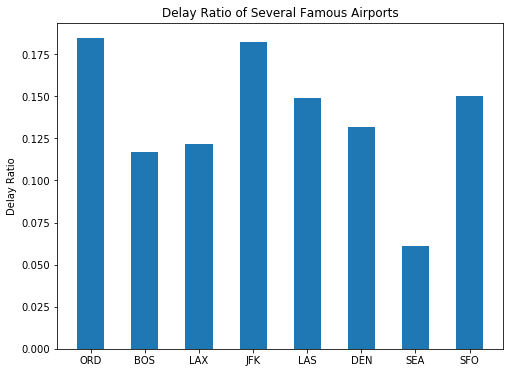

In [10]:
plt.figure(figsize=(8, 6))
airports = ('ORD', 'BOS', 'LAX', 'JFK', 'LAS','DEN','SEA','SFO')
y_pos = np.arange(len(airports))
airport_means = [ORD_mean, BOS_mean, LAX_mean, JFK_mean, LAS_mean, DEN_mean, SEA_mean, SFO_mean]

plt.bar(y_pos, airport_means, align='center', width=0.5)
plt.xticks(y_pos, airports)
plt.ylabel('Delay Ratio')
plt.title('Delay Ratio of Several Famous Airports')
plt.show()

In [11]:
DEP_rank = df1['ORIGIN_AIRPORT'].value_counts()[:10]
ARR_rank = df1['DESTINATION_AIRPORT'].value_counts()[:10]
# DEP_rank, ARR_rank

In [12]:
busiest = pd.concat([DEP_rank, ARR_rank], axis=1, join='inner')
busiest["Traffic"] = busiest["ORIGIN_AIRPORT"] + busiest["DESTINATION_AIRPORT"]
traffic = busiest["Traffic"].values
traffic

array([102555,  71887,  62990,  53364,  50658,  42103,  39563,  36489,
        35488])

In [13]:
# busiest

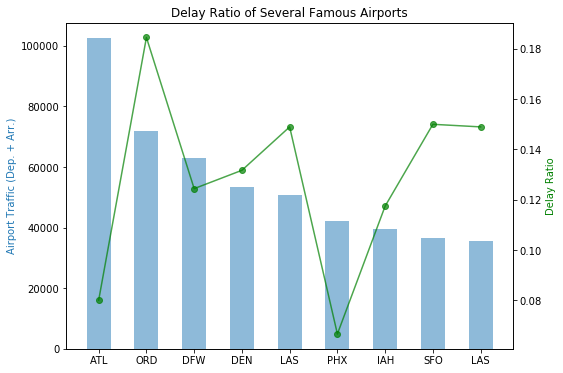

In [14]:
fig,ax1 = plt.subplots(figsize=(8, 6))
busiest_airports = ('ATL', 'ORD', 'DFW', 'DEN', 'LAS','PHX','IAH','SFO','LAS')
y_pos = np.arange(len(busiest_airports))
busiest_delay = [ATL_mean, ORD_mean, DFW_mean, DEN_mean, LAS_mean, PHX_mean, IAH_mean, SFO_mean, LAS_mean]

ax1.bar(y_pos, traffic, align='center', width=0.5, color = 'C0', alpha = 0.5)
plt.xticks(y_pos, busiest_airports)
ax1.set_ylabel('Airport Traffic (Dep. + Arr.)', color = 'C0')
ax1.set_title('Delay Ratio of Several Famous Airports')

ax2 = ax1.twinx()
ax2.plot(y_pos, busiest_delay, marker = 'o', color = 'green', alpha = 0.7)
ax2.set_ylabel('Delay Ratio', color = 'green')

plt.show()

### Question 4. (20pts) Build a classification model that classifies delays according to DELAY_OR_NOT. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results.

### Base Model: with only one prediction "Airline"

In [15]:
df_base = df1.copy()
df_base = df_base[['AIRLINE', 'DATE', 'DELAY_OR_NOT']]

- Since it is a very large dataset, I select the data from January 2015, and use the first three weeks as a training set, and the last week as a test set.

In [16]:
df_base['DATE'] = pd.to_datetime(df_base['DATE'])
df_train_base = df_base[df_base['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test_base = df_base[df_base['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
df_test_base = df_test_base[df_test_base['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

In [17]:
categorical_cols = ['AIRLINE']
df_train_base = pd.get_dummies(df_train_base, columns=categorical_cols, drop_first=True)
df_test_base = pd.get_dummies(df_test_base, columns=categorical_cols, drop_first=True)
# df_train.head()

In [18]:
X_train_base = df_train_base.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train_base = df_train_base['DELAY_OR_NOT']
X_test_base = df_test_base.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_base = df_test_base['DELAY_OR_NOT']

In [19]:
logreg = LogisticRegression(C=100000, fit_intercept=False)
logreg.fit(X_train_base, y_train_base)
y_hat_train_base = logreg.predict(X_train_base)
y_hat_test_base = logreg.predict(X_test_base)
print("Train accuracy (base model): ", logreg.score(X_train_base, y_train_base))
print("Test accuracy (base model): ", logreg.score(X_test_base, y_test_base))

Train accuracy (base model):  0.849155260161
Test accuracy (base model):  0.908758590437


In [20]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_base, y_train_base)
y_hat_train_base = logregcv.predict(X_train_base)
y_hat_test_base = logregcv.predict(X_test_base)
print("Train accuracy (base model): ", logregcv.score(X_train_base, y_train_base))
print("Test accuracy (base model): ", logregcv.score(X_test_base, y_test_base))

Train accuracy (base model):  0.849155260161
Test accuracy (base model):  0.908758590437


### Check AUC of the base model:

In [21]:
preds_base = logregcv.predict_proba(X_test_base)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_test_base, preds_base)
roc_auc1 = auc(fpr1, tpr1)
print("AUC of the base model:", roc_auc1)

AUC of the base model: 0.632110524063


In [22]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.1', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 3))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

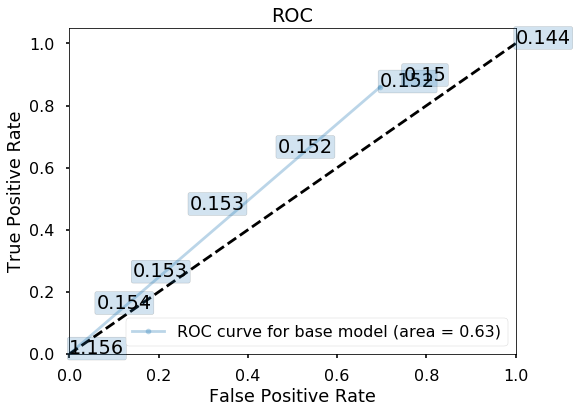

In [23]:
sns.set_context("poster")
plt.figure(figsize=(8,6))
ax=make_roc("base model",logregcv, y_test_base, X_test_base, labe=2, skip=10)

### Now we introduce more predictors:

In [24]:
df3 = df1.copy()
df3.head()

total_airports = df1['ORIGIN_AIRPORT'].value_counts()[:40]
total_airports = total_airports.index.tolist()

df3 = df3[['AIRLINE','DISTANCE', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',\
         'SCHEDULED_TIME', 'DATE', 'DELAY_OR_NOT']]
df3 = df3[df3['ORIGIN_AIRPORT'].isin(total_airports)]
df3 = df3[df3['DESTINATION_AIRPORT'].isin(total_airports)]



df3['DATE'] = pd.to_datetime(df3['DATE'])
df_train3 = df3[df3['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test3 = df3[df3['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
df_test3 = df_test3[df_test3['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_train3 = pd.get_dummies(df_train3, columns=categorical_cols, drop_first=True)
df_test3 = pd.get_dummies(df_test3, columns=categorical_cols, drop_first=True)

df_train3 = df_train3.reset_index(drop=True)

X_train3 = df_train3.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train3 = df_train3['DELAY_OR_NOT']
X_test3 = df_test3.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test3 = df_test3['DELAY_OR_NOT']

In [25]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train3, y_train3)
y_hat_train3 = logregcv.predict(X_train3)
y_hat_test3 = logregcv.predict(X_test3)
print("Train accuracy (fitted model): ", logregcv.score(X_train3, y_train3))
print("Test accuracy (fitted model): ", logregcv.score(X_test3, y_test3))

preds3 = logregcv.predict_proba(X_test3)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test3, preds3)
roc_auc3 = auc(fpr3, tpr3)
print("AUC of the fitted model:", roc_auc3)

Train accuracy (fitted model):  0.855841299762
Test accuracy (fitted model):  0.910750215579
AUC of the fitted model: 0.695213747707


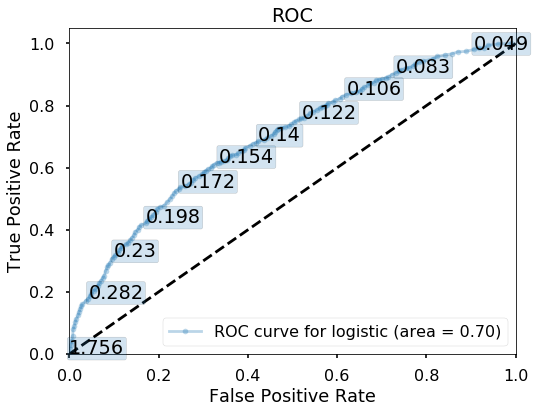

In [26]:
sns.set_context("poster")
plt.figure(figsize=(8,6))
ax=make_roc("logistic",logregcv, y_test3, X_test3, labe=150, skip=10)

In [27]:
conf_mat = confusion_matrix(y_test3, y_hat_test3)
conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df

,y_hat=0,y_hat = 1
y=0,6324,8
y=1,613,13


In [28]:
print("True Positive Rate for Fitted: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

True Positive Rate for Fitted:  0.0207667731629
True Negative Rate for Fitted:  0.998736576121


In [29]:
print("TPR when FPR=0.5:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.5])])
print("Threshold when FPR=0.5:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.5])])

TPR when FPR=0.5: 0.744408945687
Threshold when FPR=0.5: 0.125616445479


### Question 5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.

In [30]:
logregcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [31]:
X_train3m = X_train3.as_matrix()
y_train3m = y_train3.as_matrix()

In [32]:
B = 100 # Number of iterations

boot_coefs = np.zeros((X_train3m.shape[1],B)) # Create empty storage array for later use

for i in range(B):
    # Sampling WITH replacement the indices of a resampled dataset
    sample_index = np.random.choice(range(len(y_train3m)), size=len(y_train3m), replace=True)
    X_train_samples = X_train3m[sample_index]
    y_train_samples = y_train3m[sample_index]
    
    logistic_mod_boot = LogisticRegression(C=10, fit_intercept=False)
    logistic_mod_boot.fit(X_train_samples, y_train_samples)
    boot_coefs[:,i] = logistic_mod_boot.coef_

boot_coefs.shape

(94, 100)

In [33]:
ci_upper = np.percentile(boot_coefs, 97.5, axis=1)
ci_lower = np.percentile(boot_coefs, 2.5, axis=1)

In [34]:
sig_b_ct = 0

# if ci contains 0, then insignificant
idx = []
for i in range(len(ci_upper)):
    if ci_upper[i]<0 or ci_lower[i]>0:
        sig_b_ct += 1
        idx.append(i)

print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, X_train3.shape[1]))

Significant coefficents at 5pct level = 62 / 94


In [35]:
sig_cols = []
for i in idx:
    sig_cols.append(X_train3.columns[i])
sig_cols

['DISTANCE',
 'SCHEDULED_TIME',
 'AIRLINE_AS',
 'AIRLINE_B6',
 'AIRLINE_DL',
 'AIRLINE_F9',
 'AIRLINE_HA',
 'AIRLINE_MQ',
 'AIRLINE_NK',
 'AIRLINE_OO',
 'AIRLINE_US',
 'AIRLINE_VX',
 'ORIGIN_AIRPORT_AUS',
 'ORIGIN_AIRPORT_BNA',
 'ORIGIN_AIRPORT_BOS',
 'ORIGIN_AIRPORT_BWI',
 'ORIGIN_AIRPORT_DCA',
 'ORIGIN_AIRPORT_DFW',
 'ORIGIN_AIRPORT_DTW',
 'ORIGIN_AIRPORT_EWR',
 'ORIGIN_AIRPORT_FLL',
 'ORIGIN_AIRPORT_HNL',
 'ORIGIN_AIRPORT_IAH',
 'ORIGIN_AIRPORT_JFK',
 'ORIGIN_AIRPORT_LAS',
 'ORIGIN_AIRPORT_LAX',
 'ORIGIN_AIRPORT_LGA',
 'ORIGIN_AIRPORT_MCI',
 'ORIGIN_AIRPORT_MDW',
 'ORIGIN_AIRPORT_MIA',
 'ORIGIN_AIRPORT_MSY',
 'ORIGIN_AIRPORT_OAK',
 'ORIGIN_AIRPORT_ORD',
 'ORIGIN_AIRPORT_PDX',
 'ORIGIN_AIRPORT_PHL',
 'ORIGIN_AIRPORT_PHX',
 'ORIGIN_AIRPORT_SAN',
 'ORIGIN_AIRPORT_SEA',
 'ORIGIN_AIRPORT_SJC',
 'ORIGIN_AIRPORT_SLC',
 'ORIGIN_AIRPORT_SMF',
 'ORIGIN_AIRPORT_SNA',
 'ORIGIN_AIRPORT_TPA',
 'DESTINATION_AIRPORT_BOS',
 'DESTINATION_AIRPORT_BWI',
 'DESTINATION_AIRPORT_CLT',
 'DESTINATION_AIRPORT

### Question 6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set.

In [36]:
df_test_rest = df3[df3['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_test_rest = pd.get_dummies(df_test_rest, columns=categorical_cols, drop_first=True)
X_test_rest = df_test_rest.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest = df_test_rest['DELAY_OR_NOT']

In [37]:
df_test_rest.shape
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest, y_test_rest))

y_hat_test_rest = logregcv.predict(X_test_rest)

The rest of test set (excluding training and test) accuracy:  0.883175614873


In [38]:
conf_mat2 = confusion_matrix(y_test_rest, y_hat_test_rest)
conf_df2 = pd.DataFrame(conf_mat2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df2

,y_hat=0,y_hat = 1
y=0,307313,1026
y=1,39738,857


In [39]:
print("True Positive Rate for the rest test set: ", float(conf_mat2[1][1])/(conf_mat2[1][1]+ conf_mat2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat2[0][0])/(conf_mat2[0][0] + conf_mat2[0][1]))

True Positive Rate for the rest test set:  0.0211109742579
True Negative Rate for the rest test set:  0.996672493587


In [40]:
preds_rest = logregcv.predict_proba(X_test_rest)[:,1]
fpr_rest, tpr_rest, thresholds_rest = roc_curve(y_test_rest, preds_rest)
roc_auc_rest = auc(fpr_rest, tpr_rest)
print("AUC of the fitted model:", roc_auc_rest)

AUC of the fitted model: 0.676359441489


In [41]:
print("TPR when FPR=0.5:", tpr_rest[np.min([i for i, x in enumerate(fpr_rest) if x>=0.5])])
print("Threshold when FPR=0.5:",thresholds_rest[np.min([i for i, x in enumerate(fpr_rest) if x>=0.5])])

TPR when FPR=0.5: 0.744771523587
Threshold when FPR=0.5: 0.133186073507


In [42]:
df_test_rest["Airline"] = df1.AIRLINE
df_test_rest["prediction"] = logregcv.predict(X_test_rest)
delay_prediction = df_test_rest.groupby('Airline')['prediction'].mean()
delay_prediction

Airline
AA    0.000000
AS    0.000000
B6    0.000000
DL    0.000000
EV    0.000000
F9    0.017585
HA    0.000000
MQ    0.040847
NK    0.163139
OO    0.000796
UA    0.009484
US    0.000000
VX    0.000000
WN    0.000000
Name: prediction, dtype: float64

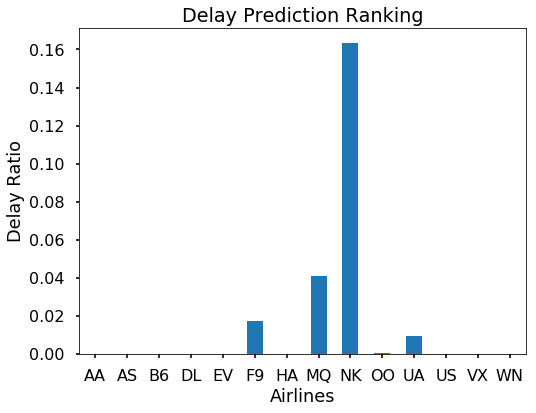

In [43]:
ax = delay_prediction.plot(kind='bar', title="Delay Prediction Ranking", figsize=(8,6), rot=0)
ax.set_xlabel('Airlines')
ax.set_ylabel('Delay Ratio')
plt.show()

### Question 7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.

In [126]:
df_delay = df1[df1.DELAY_OR_NOT.isin([1])]
df_delay.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
19,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,18:35:00,...,132.0,666,135.0,146.0,11.0,0.0,20.0,101.0,0.0,1
25,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,17:33:00,...,98.0,482,107.0,93.0,0.0,0.0,0.0,98.0,0.0,1
28,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,18:15:00,...,128.0,867,167.0,161.0,0.0,0.0,0.0,128.0,0.0,1
54,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,14:00:00,...,38.0,184,63.0,106.0,38.0,0.0,0.0,0.0,0.0,1
59,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,16:41:00,...,148.0,190,64.0,72.0,8.0,0.0,95.0,45.0,0.0,1


In [82]:
print(list(df_delay))

['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT']


In [115]:
df4 = df_delay[["AIRLINE", "DISTANCE"]]
categorical_cols = ['AIRLINE']
df4 = pd.get_dummies(df4, columns=categorical_cols, drop_first=True)
df4["delay_log"] = np.log(df1["ARRIVAL_DELAY"])
df4.head()

X4 = df4.loc[:, df4.columns != 'delay_log']
y4 = df4["delay_log"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=42)

ols = LinearRegression(fit_intercept=True)
ols.fit(X_train4, y_train4)
print('OLS Train Score', ols.score(X_train4, y_train4))
print('OLS Test Score', ols.score(X_test4, y_test4))

OLS Train Score 0.0129717791325
OLS Test Score 0.01102211445


/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [198]:
df_delay = df1[df1.DELAY_OR_NOT.isin([1])]
# df_delay = df_delay[["AIRLINE", "DISTANCE", \
#                      'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',\
#                      "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", \
#                      "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]]
dep_time = df_delay['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df_delay['dep_hour'] = dep_h

arr_time = df_delay['SCHED_ARR'].values
arr_hour = []
for t in arr_time:
    arr_hour.append(t[:2])
arr_h = list(map(int, arr_hour))
df_delay['arr_hour'] = arr_h

df_delay = df_delay[["AIRLINE", "MONTH", "DAY_OF_WEEK", "DISTANCE", "SCHEDULED_TIME", "dep_hour", "arr_hour"]]
df_delay["dep_hour2"] = df_delay["dep_hour"] ** 2
df_delay["arr_hour2"] = df_delay["arr_hour"] ** 2
# df_delay["MONTHxDAY_OF_WEEK"] = df_delay["MONTH"] * df_delay["DAY_OF_WEEK"]
df_delay["dep_arr"] = df_delay["dep_hour"] * df_delay["arr_hour"]


# df_delay["dep_hour x DISTANCE"] = df_delay["dep_hour"] * df_delay["DISTANCE"]
# categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
categorical_cols = ['AIRLINE', "MONTH", "DAY_OF_WEEK"]
df_delay = pd.get_dummies(df_delay, columns=categorical_cols, drop_first=True)
df_delay["delay_log"] = np.log(df1["ARRIVAL_DELAY"])
df_delay.head()

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid va

,DISTANCE,SCHEDULED_TIME,dep_hour,arr_hour,dep_hour2,arr_hour2,dep_arr,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,...,MONTH_10,MONTH_11,MONTH_12,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,delay_log
19,666,135.0,18,20,324,400,360,0,0,0,...,0,0,0,0,0,0,0,0,1,4.882802
25,482,107.0,17,19,289,361,323,0,0,0,...,0,0,0,0,1,0,0,0,0,4.584967
28,867,167.0,18,21,324,441,378,0,0,0,...,0,0,0,0,0,0,0,0,0,4.852030
54,184,63.0,14,15,196,225,210,0,0,0,...,0,0,0,0,0,1,0,0,0,3.637586
59,190,64.0,16,17,256,289,272,0,0,0,...,0,0,0,0,0,0,0,0,0,4.997212


In [199]:
X = df_delay.loc[:, df_delay.columns != 'delay_log']
y = df_delay["delay_log"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [200]:
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train2, y_train2)
print('OLS Train Score', ols.score(X_train2, y_train2))
print('OLS Test Score', ols.score(X_test2, y_test2))

OLS Train Score 0.0401519411742
OLS Test Score 0.0350644991468


In [201]:
lambdas = [.001,.005,1,5,10,50,100,500,1000]
clfl = LassoCV(cv=10, alphas=lambdas, fit_intercept=True, normalize=False)
preprocessing.StandardScaler()
clfl.fit(X_train2, y_train2)

print('Lasso Train Score', clfl.score(X_train2, y_train2))
print('Lasso Test Score', clfl.score(X_test2, y_test2))

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Train Score 0.0385004735859
Lasso Test Score 0.0344198275931


## 209 Additional questions
### 1. (10pts) Engineer two additional features that will help improve the classification model's performance.

In [50]:
df_eng = df1.copy()
df_eng.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


In [51]:
df_eng["speed"] = df_eng["DISTANCE"] / df_eng["SCHEDULED_TIME"]

dep_time = df_eng['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df_eng['dep_hour'] = dep_h

df_eng.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,speed,dep_hour
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0,5.429630,7
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0,5.724832,20
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0,4.833333,12
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0,7.688462,11
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0,5.076190,14


In [52]:
total_airports = df1['ORIGIN_AIRPORT'].value_counts()[:40]
total_airports = total_airports.index.tolist()

df_eng = df_eng[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','speed', 'dep_hour',\
                 'DATE', 'DELAY_OR_NOT']]
df_eng = df_eng[df_eng['ORIGIN_AIRPORT'].isin(total_airports)]
df_eng = df_eng[df_eng['DESTINATION_AIRPORT'].isin(total_airports)]


df_eng['DATE'] = pd.to_datetime(df_eng['DATE'])
df_train_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
df_test_eng = df_test_eng[df_test_eng['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_train_eng = pd.get_dummies(df_train_eng, columns=categorical_cols, drop_first=True)
df_test_eng = pd.get_dummies(df_test_eng, columns=categorical_cols, drop_first=True)

df_train_eng = df_train_eng.reset_index(drop=True)

X_train_eng = df_train_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train_eng = df_train_eng['DELAY_OR_NOT']
X_test_eng = df_test_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_eng = df_test_eng['DELAY_OR_NOT']

In [53]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_eng, y_train_eng)
y_hat_train_eng = logregcv.predict(X_train_eng)
y_hat_test_eng = logregcv.predict(X_test_eng)
print("Train accuracy (engineered): ", logregcv.score(X_train_eng, y_train_eng))
print("Test accuracy (engineered): ", logregcv.score(X_test_eng, y_test_eng))

preds_eng = logregcv.predict_proba(X_test_eng)[:,1]
fpr_eng, tpr_eng, thresholds_eng = roc_curve(y_test_eng, preds_eng)
roc_auc_eng = auc(fpr_eng, tpr_eng)
print("AUC of the fitted model:", roc_auc_eng)

Train accuracy (engineered):  0.884879493739
Test accuracy (engineered):  0.9103190572
AUC of the fitted model: 0.817629001431


In [54]:
conf_mat_eng = confusion_matrix(y_test_eng, y_hat_test_eng)
conf_df_eng = pd.DataFrame(conf_mat_eng, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_eng

,y_hat=0,y_hat = 1
y=0,6164,168
y=1,456,170


In [55]:
df_eng['DATE'] = pd.to_datetime(df_eng['DATE'])
df_test_rest_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_test_rest_eng = pd.get_dummies(df_test_rest_eng, columns=categorical_cols, drop_first=True)
X_test_rest_eng = df_test_rest_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest_eng = df_test_rest_eng['DELAY_OR_NOT']

In [56]:
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest_eng, y_test_rest_eng))
y_hat_test_rest_eng = logregcv.predict(X_test_rest_eng)

The rest of test set (excluding training and test) accuracy:  0.891340482727


In [57]:
conf_mat_eng2 = confusion_matrix(y_test_rest_eng, y_hat_test_rest_eng)
conf_df_eng2 = pd.DataFrame(conf_mat_eng2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_eng2

,y_hat=0,y_hat = 1
y=0,296579,11760
y=1,26155,14440


In [58]:
print("True Positive Rate for the rest test set: ", float(conf_mat_eng2[1][1])/(conf_mat_eng2[1][1]+ conf_mat_eng2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat_eng2[0][0])/(conf_mat_eng2[0][0] + conf_mat_eng2[0][1]))

True Positive Rate for the rest test set:  0.355708831137
True Negative Rate for the rest test set:  0.961860160408


In [59]:
preds_rest_eng = logregcv.predict_proba(X_test_rest_eng)[:,1]
fpr_rest_eng, tpr_rest_eng, thresholds_rest_eng = roc_curve(y_test_rest_eng, preds_rest_eng)
roc_auc_rest_eng = auc(fpr_rest_eng, tpr_rest_eng)
print("AUC of the engineered model:", roc_auc_rest_eng)

AUC of the engineered model: 0.812914242406


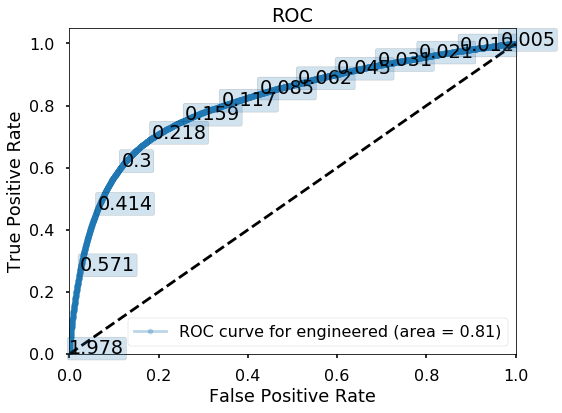

In [60]:
plt.figure(figsize=(8,6))
ax=make_roc("engineered",logregcv, y_test_rest_eng, X_test_rest_eng, labe=5000, skip=10)

### 2. (5pts) Add one additional feature from a data source not given to you. Do this only after you complete the rest of the exam.

In [61]:
df_eng.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,speed,dep_hour,DATE,DELAY_OR_NOT
0,AA,ORD,LGA,5.429630,7,2015-09-19,0
3,WN,PHX,BWI,7.688462,11,2015-12-01,0
4,WN,MCI,DEN,5.076190,14,2015-09-15,0
5,WN,DTW,MDW,2.533333,9,2015-01-29,0
8,VX,LAX,EWR,7.550769,8,2015-09-17,0


In [62]:
df_holiday = pd.read_csv('federal-holidays-2015.csv')
new_header = df_holiday.iloc[0]
df_holiday = df_holiday[1:] 
df_holiday.columns = new_header
df_holiday.drop(df_holiday.tail(1).index,inplace=True)
df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])
df_holiday["Holiday_or_not"] = 1
df_holiday = df_holiday[["Date", "Holiday_or_not"]]
df_holiday = df_holiday.rename(columns = {"Date": "DATE"})
df_holiday

,DATE,Holiday_or_not
1,2015-01-01,1
2,2015-01-19,1
3,2015-02-16,1
4,2015-05-25,1
5,2015-07-03,1
6,2015-07-04,1
7,2015-09-07,1
8,2015-10-12,1
9,2015-11-11,1
10,2015-11-26,1


In [63]:
df_new = pd.merge(df_eng, df_holiday, how='left', on='DATE')
df_new = df_new.fillna(0)

In [64]:
df_new['DATE'] = pd.to_datetime(df_new['DATE'])
df_train_new = df_new[df_new['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test_new = df_new[df_new['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
df_test_new = df_test_new[df_test_new['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_train_new = pd.get_dummies(df_train_new, columns=categorical_cols, drop_first=True)
df_test_new = pd.get_dummies(df_test_new, columns=categorical_cols, drop_first=True)

X_train_new = df_train_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train_new = df_train_new['DELAY_OR_NOT']
X_test_new = df_test_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_new = df_test_new['DELAY_OR_NOT']

In [65]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_new, y_train_new)
y_hat_train_new = logregcv.predict(X_train_new)
y_hat_test_new = logregcv.predict(X_test_new)
print("Train accuracy (new feature): ", logregcv.score(X_train_new, y_train_new))
print("Test accuracy (new feature): ", logregcv.score(X_test_new, y_test_new))

preds_new = logregcv.predict_proba(X_test_new)[:,1]
fpr_new, tpr_new, thresholds_new = roc_curve(y_test_new, preds_new)
roc_auc_new = auc(fpr_new, tpr_new)
print("AUC of the fitted model:", roc_auc_new)

Train accuracy (new feature):  0.884879493739
Test accuracy (new feature):  0.9103190572
AUC of the fitted model: 0.817602259632


In [66]:
conf_mat_new = confusion_matrix(y_test_new, y_hat_test_new)
conf_df_new = pd.DataFrame(conf_mat_new, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_new

,y_hat=0,y_hat = 1
y=0,6164,168
y=1,456,170


In [67]:
df_test_rest_new = df_new[df_new['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_test_rest_new = pd.get_dummies(df_test_rest_new, columns=categorical_cols, drop_first=True)
X_test_rest_new = df_test_rest_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest_new = df_test_rest_new['DELAY_OR_NOT']

In [68]:
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest_new, y_test_rest_new))
y_hat_test_rest_new = logregcv.predict(X_test_rest_new)

The rest of test set (excluding training and test) accuracy:  0.891426458872


In [69]:
conf_mat_new2 = confusion_matrix(y_test_rest_new, y_hat_test_rest_new)
conf_df_new2 = pd.DataFrame(conf_mat_new2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_new2

,y_hat=0,y_hat = 1
y=0,296534,11805
y=1,26080,14515


In [70]:
print("True Positive Rate for the rest test set: ", float(conf_mat_new2[1][1])/(conf_mat_new2[1][1]+ conf_mat_new2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat_new2[0][0])/(conf_mat_new2[0][0] + conf_mat_new2[0][1]))

True Positive Rate for the rest test set:  0.357556349304
True Negative Rate for the rest test set:  0.961714217144


In [71]:
preds_rest_new = logregcv.predict_proba(X_test_rest_new)[:,1]
fpr_rest_new, tpr_rest_new, thresholds_rest_new = roc_curve(y_test_rest_new, preds_rest_new)
roc_auc_rest_new = auc(fpr_rest_new, tpr_rest_new)
print("AUC of the engineered model with the new feature:", roc_auc_rest_new)

AUC of the engineered model with the new feature: 0.812965070591


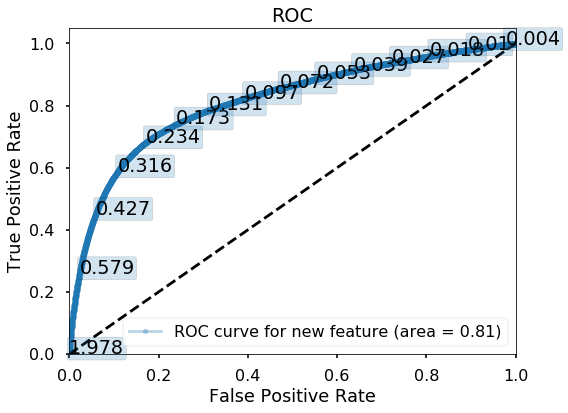

In [72]:
plt.figure(figsize=(8,6))
ax=make_roc("new feature",logregcv, y_test_rest_new, X_test_rest_new, labe=5000, skip=10)

### Question 8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.